# Optional Lab - Derivatives
This lab will give you a more intuitive understanding of derivatives. It will show you a simple way of calculating derivatives arithmetically. It will also introduce you to a handy Python library that allows you to calculate derivatives symbolically.

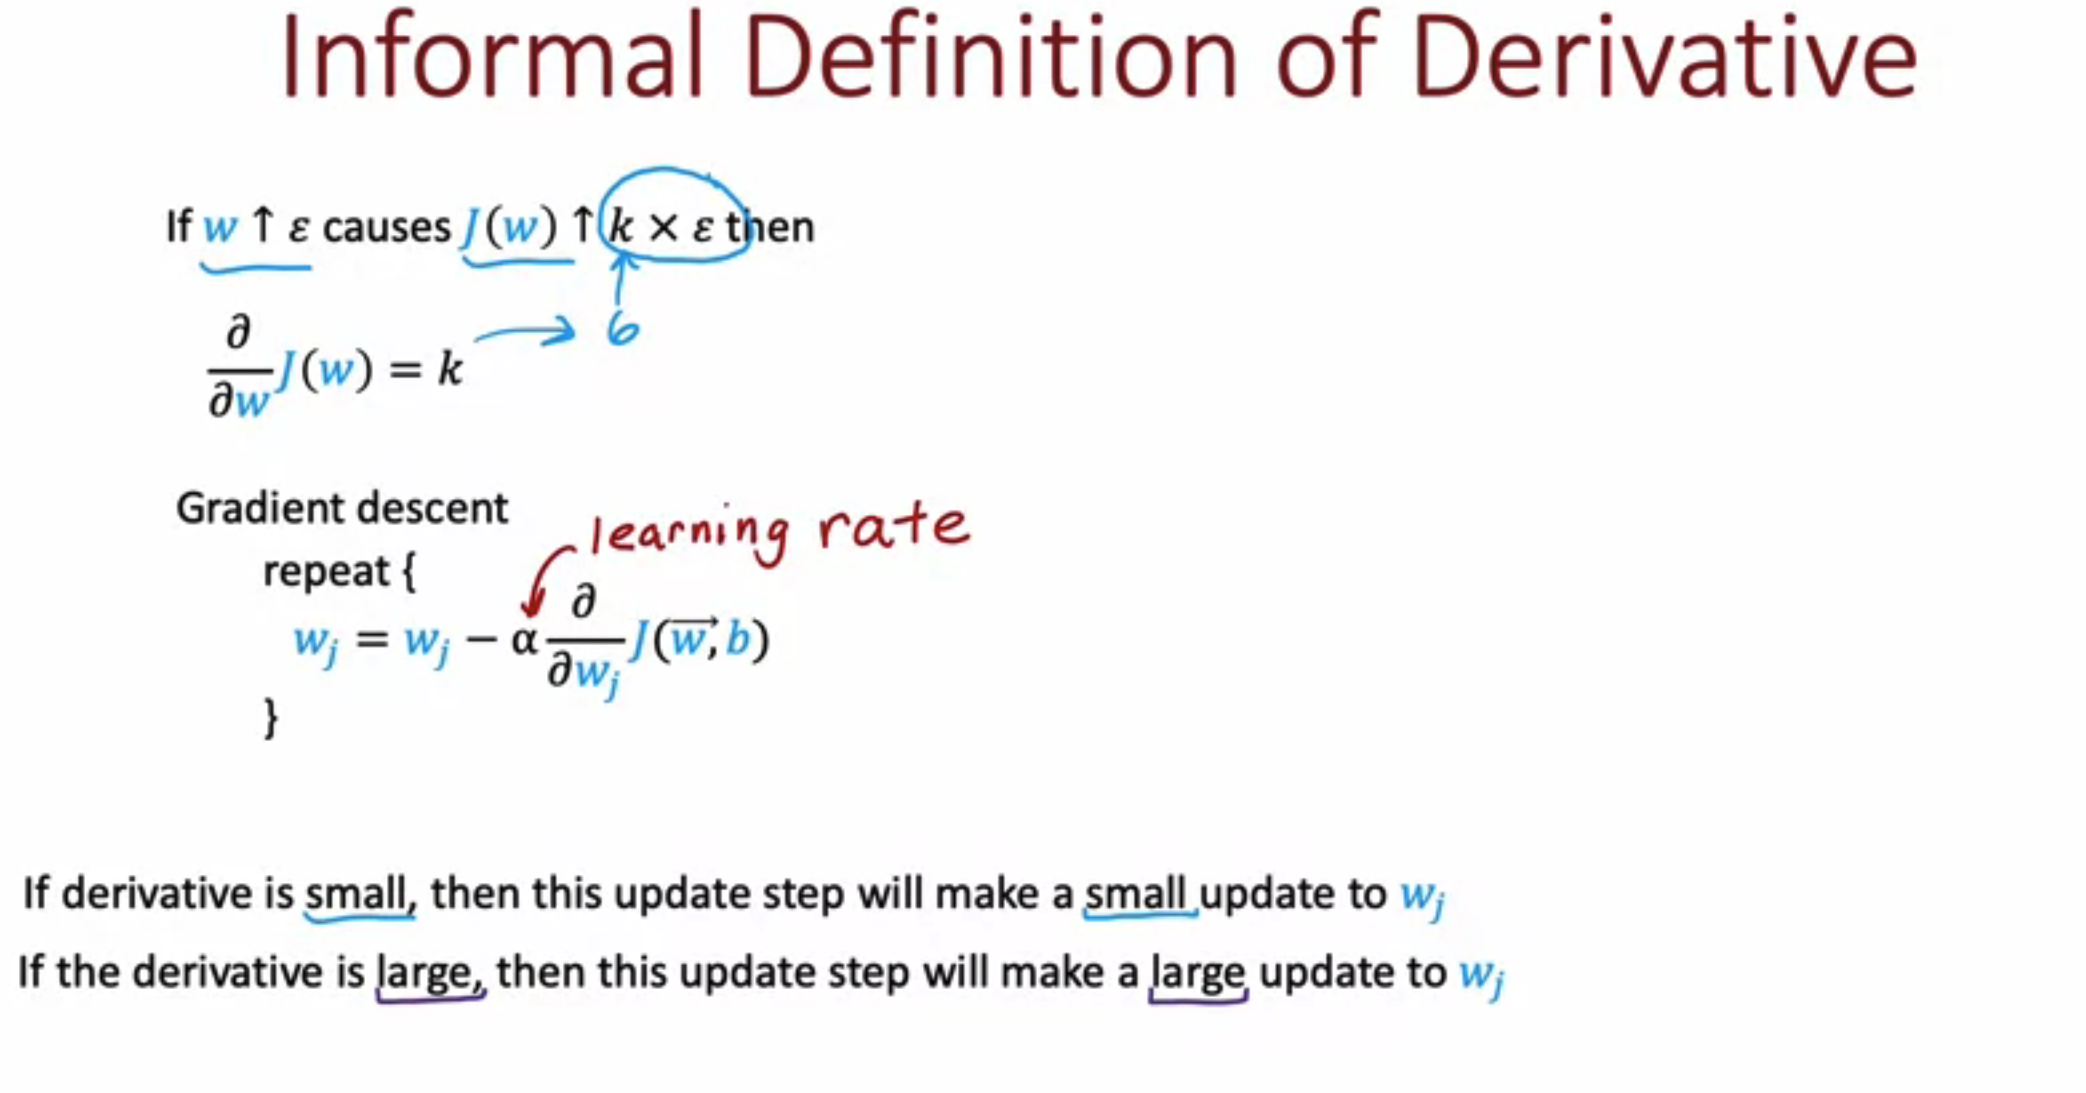

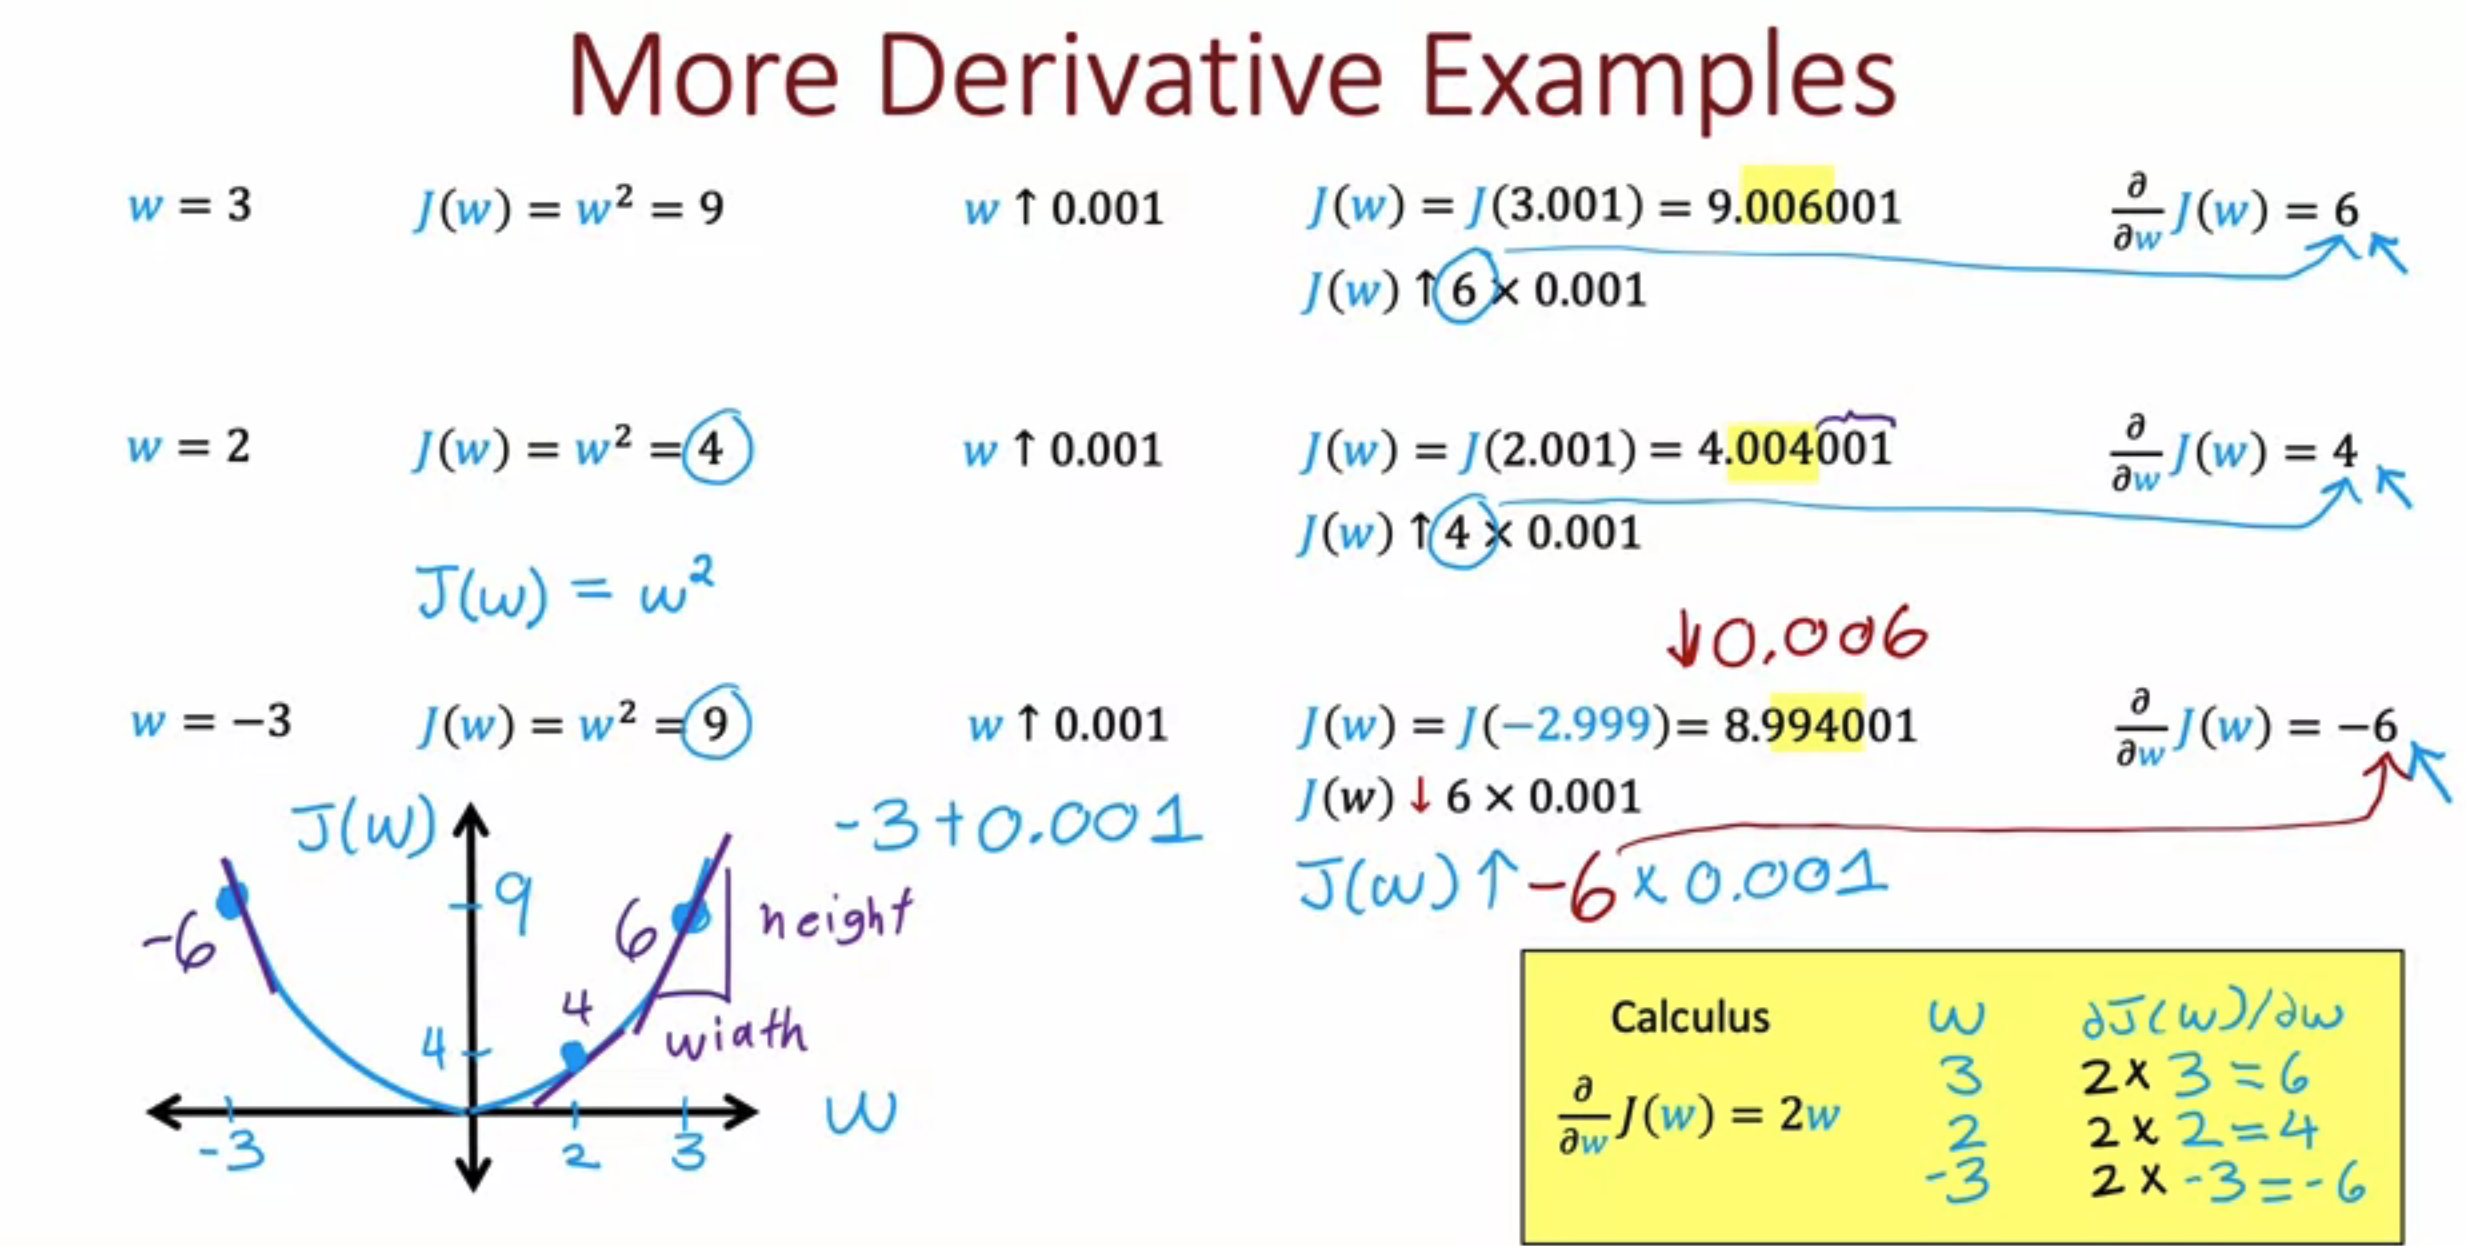

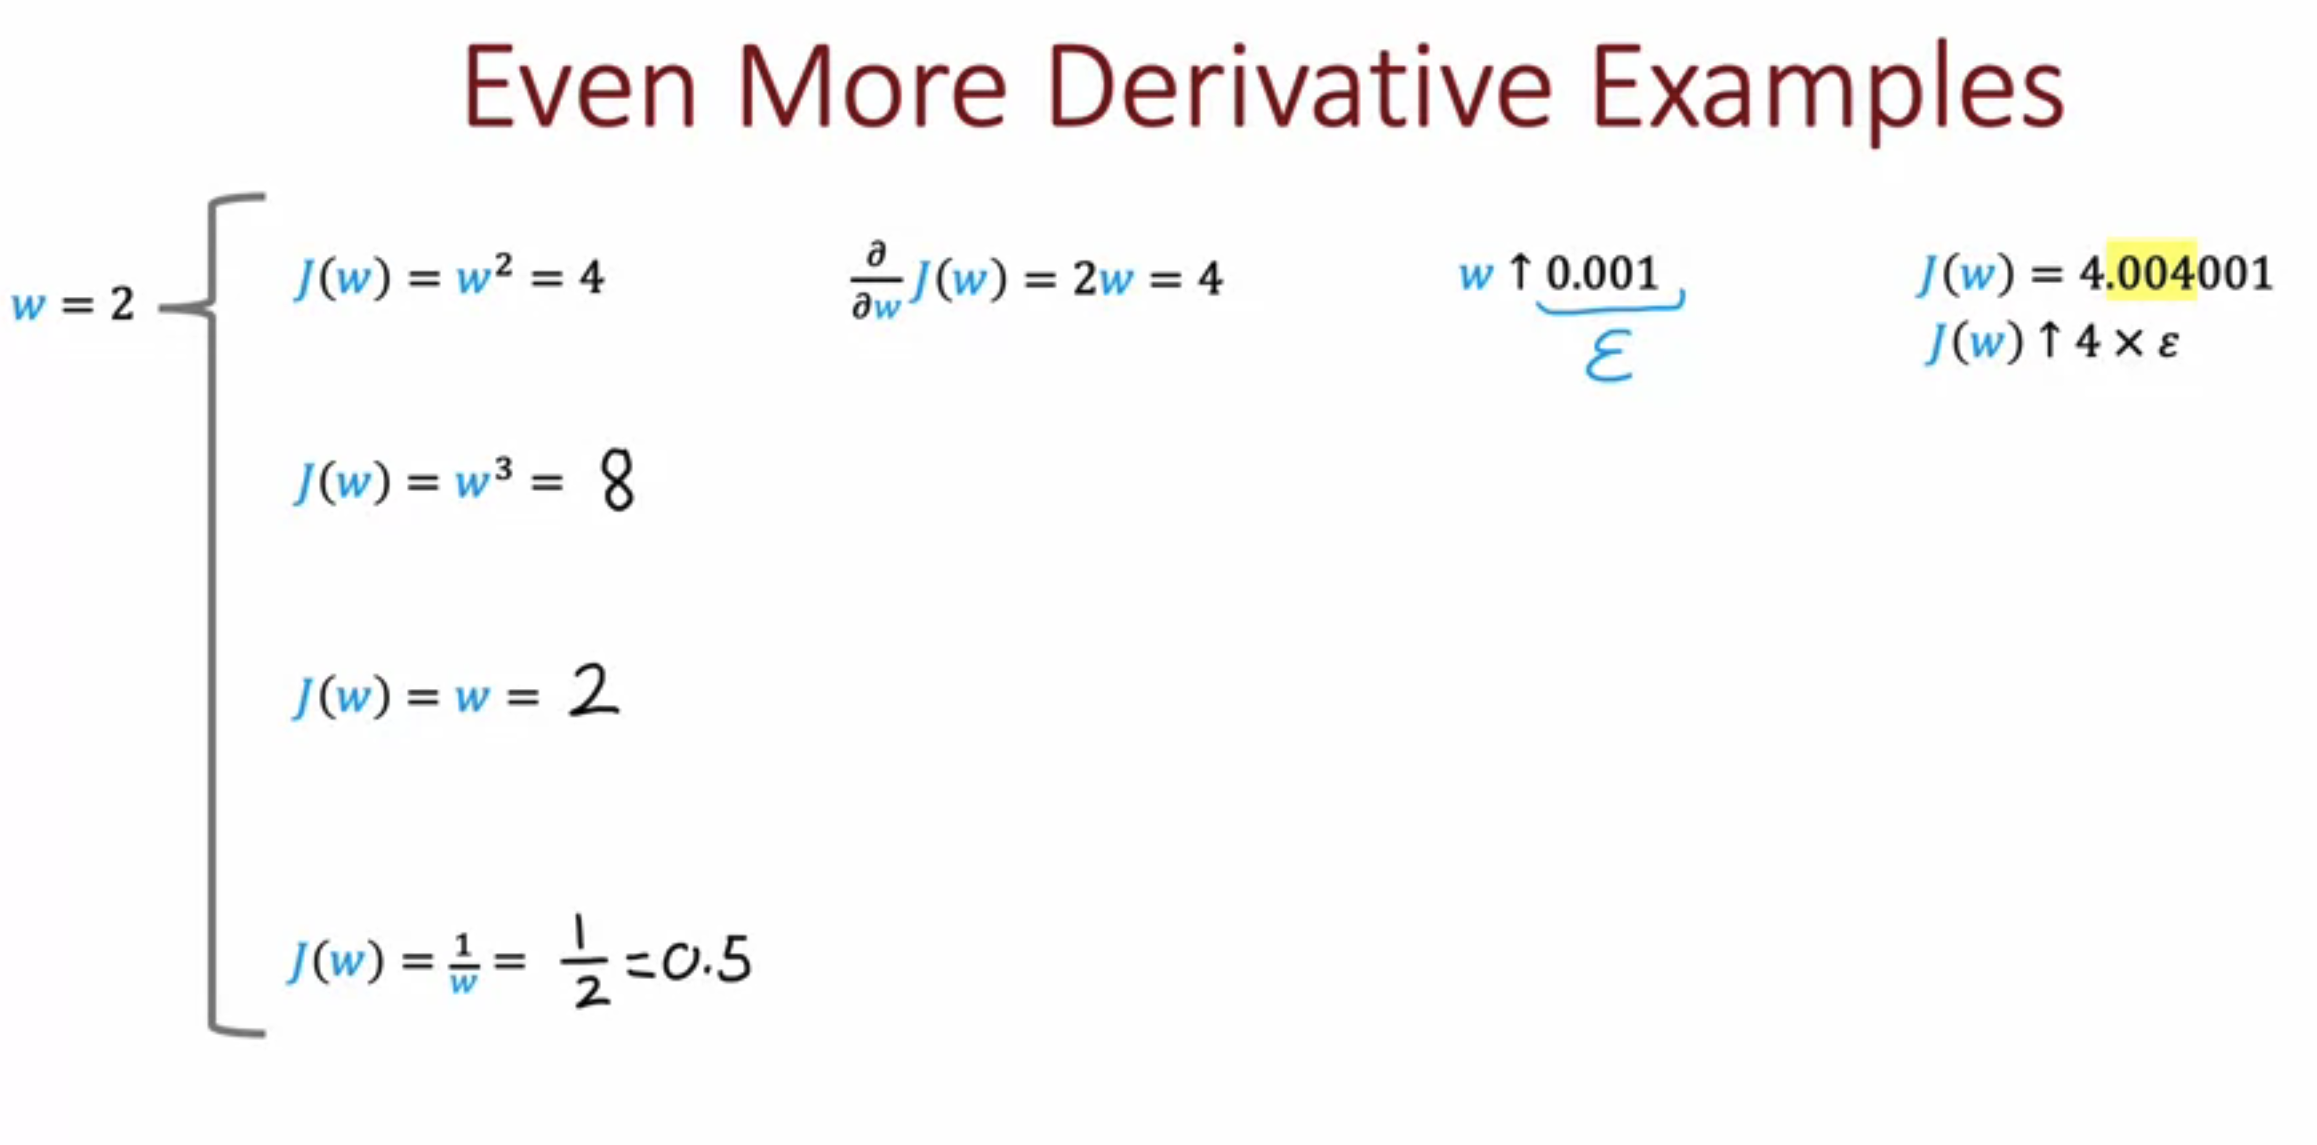

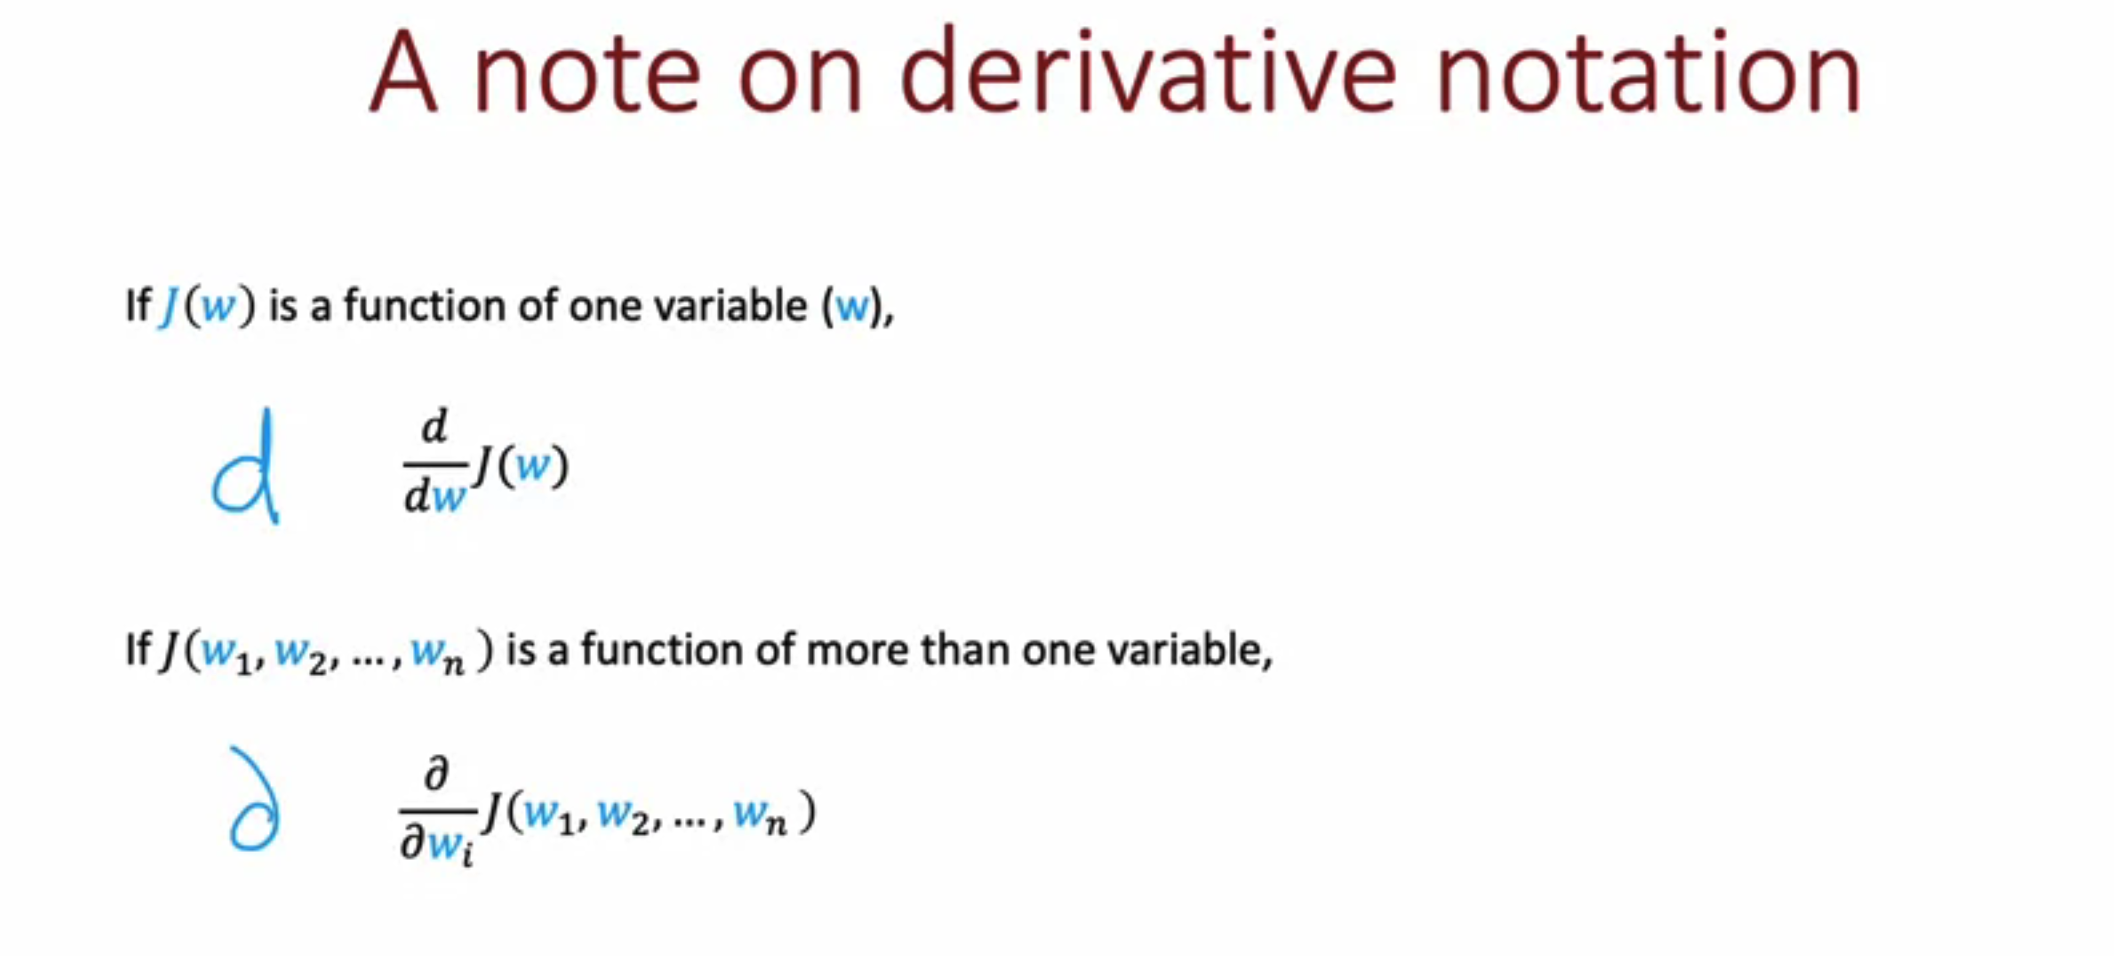

In [1]:
from sympy import symbols, diff

## Informal definition of derivatives

The formal definition of derivatives can be a bit daunting with limits and values 'going to zero'. The idea is really much simpler. 

The derivative of a function describes how the output of a function changes when there is a small change in an input variable.

Let's use the cost function $J(w)$ as an example. The cost $J$ is the output and $w$ is the input variable.  
Let's give a 'small change' a name *epsilon* or $\epsilon$. We use these Greek letters because it is traditional in mathematics to use *epsilon*($\epsilon$) or *delta* ($\Delta$) to represent a small value. You can think of it as representing 0.001 or some other small value.  

$$
\begin{equation}
\text{if } w \uparrow \epsilon \text{ causes }J(w) \uparrow \text{by }k \times \epsilon \text{ then}  \\
\frac{\partial J(w)}{\partial w} = k \tag{1}
\end{equation}
$$

This just says if you change the input to the function $J(w)$ by a little bit and the output changes by $k$ times that little bit, then the derivative of $J(w)$ is equal to $k$.

Let's try this out.  Let's look at the derivative of the function $J(w) = w^2$ at the point $w=3$ and $\epsilon = 0.001$

In [2]:
J = (3)**2
J_epsilon = (3 + 0.001)**2
k = (J_epsilon - J)/0.001    # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k:0.6f} ")

J = 9, J_epsilon = 9.006001, dJ_dw ~= k = 6.001000 


We have increased the input value a little bit (0.001), causing the output to change from 9 to 9.006001, an increase of 6 times the input increase. Referencing (1) above, this says that $k=6$, so $\frac{\partial J(w)}{\partial w} \approx 6$. If you are familiar with calculus, you know, written symbolically,  $\frac{\partial J(w)}{\partial w} = 2 w$. With $w=3$ this is 6. Our calculation above is not exactly 6 because to be exactly correct $\epsilon$ would need to be [infinitesimally small](https://www.dictionary.com/browse/infinitesimally) or really, really small. That is why we use the symbols $\approx$ or ~= rather than =. Let's see what happens if we make $\epsilon$ smaller.

In [3]:
J = (3)**2
J_epsilon = (3 + 0.000000001)**2
k = (J_epsilon - J)/0.000000001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 9, J_epsilon = 9.000000006, dJ_dw ~= k = 6.000000496442226 


The value gets close to exactly 6 as we reduce the size of $\epsilon$. Feel free to try reducing the value further.

## Finding symbolic derivatives
In backprop it is useful to know the derivative of simple functions at any input value. Put another way, we would like to know the 'symbolic' derivative rather than the 'arithmetic' derivative. An example of a symbolic derivative is,  $\frac{\partial J(w)}{\partial w} = 2 w$, the derivative of $J(w) = w^2$ above.  With the symbolic derivative you can find the value of the derivative at any input value $w$.  

If you have taken a calculus course, you are familiar with the many [differentiation rules](https://en.wikipedia.org/wiki/Differentiation_rules#Power_laws,_polynomials,_quotients,_and_reciprocals) that mathematicians have developed to solve for a derivative given an expression. Well, it turns out this process has been automated with symbolic differentiation programs. An example of this in python is the [SymPy](https://www.sympy.org/en/index.html) library. Let's take a look at how to use this.

### $J = w^2$
Define the python variables and their symbolic names.

In [4]:
J, w = symbols('J, w')

Define and print the expression. Note SymPy produces a [latex](https://en.wikibooks.org/wiki/LaTeX/Mathematics) string which generates a nicely readable equation.

In [5]:
J=w**2
J

w**2

Use SymPy's `diff` to differentiate the expression for $J$ with respect to $w$. Note the result matches our earlier example.

In [6]:
dJ_dw = diff(J,w)
dJ_dw

2*w

Evaluate the derivative at a few points by 'substituting' numeric values for the symbolic values. In the first example, $w$ is replaced by $2$.

In [7]:
dJ_dw.subs([(w,2)])    # derivative at the point w = 2

4

In [8]:
dJ_dw.subs([(w,3)])    # derivative at the point w = 3

6

In [9]:
dJ_dw.subs([(w,-3)])    # derivative at the point w = -3

-6

## $J = 2w$

In [10]:
w, J = symbols('w, J')

In [11]:
J = 2 * w
J

2*w

In [12]:
dJ_dw = diff(J,w)
dJ_dw

2

In [13]:
dJ_dw.subs([(w,-3)])    # derivative at the point w = -3

2

Compare this with the arithmetic calculation

In [14]:
J = 2*3
J_epsilon = 2*(3 + 0.001)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 6, J_epsilon = 6.002, dJ_dw ~= k = 1.9999999999997797 


For the function $J=2w$, it is easy to see that any change in $w$ will result in 2 times that amount of change in the output $J$, regardless of the starting value of $w$. Our NumPy and arithmetic results confirm this. 

## $J = w^3$

In [15]:
J, w = symbols('J, w')

In [16]:
J=w**3
J

w**3

In [17]:
dJ_dw = diff(J,w)
dJ_dw

3*w**2

In [18]:
dJ_dw.subs([(w,2)])   # derivative at the point w=2

12

Compare this with the arithmetic calculation

In [19]:
J = (2)**3
J_epsilon = (2+0.001)**3
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 8, J_epsilon = 8.012006000999998, dJ_dw ~= k = 12.006000999997823 


## $J = \frac{1}{w}$

In [20]:
J, w = symbols('J, w')

In [21]:
J= 1/w
J

1/w

In [22]:
dJ_dw = diff(J,w)
dJ_dw

-1/w**2

In [23]:
dJ_dw.subs([(w,2)])

-1/4

Compare this with the arithmetic calculation

In [24]:
J = 1/2
J_epsilon = 1/(2+0.001)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 0.5, J_epsilon = 0.49975012493753124, dJ_dw ~= k = -0.2498750624687629 


## $J = \frac{1}{w^2}$

In [25]:
J, w = symbols('J, w')

If you have time, try to repeat the above steps on the function  $J = \frac{1}{w^2}$ and evaluate at w=4

In [26]:
J = 1/(w**2)
J

w**(-2)

In [27]:
dJ_dw = diff(J, w)
dJ_dw

-2/w**3

In [28]:
dJ_dw.subs([(w, 4)])

-1/32

Compare this with the arithmetic calculation

In [29]:
J = 1/4**2
J_epsilon = 1/(4+0.001)**2
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 0.0625, J_epsilon = 0.06246876171484496, dJ_dw ~= k = -0.031238285155041345 


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python 
J= 1/w**2
dJ_dw = diff(J,w)
dJ_dw.subs([(w,4)])
```
  

</details>

    


## Congratulations!
If you have run through the above examples, you understand a derivative describes the change in the output of a function that is a result of a small change in an input to that function. You also can use *SymPy* in python to find the symbolic derivative of functions.